## Bell States

<div class="alert alert-block alert-info">
Bell state is constructed with application of $\textbf{Hadamard}$ and $\textbf{CNOT}$ gates in two qubit system.
</div>

In [1]:
%matplotlib inline
import numpy as np
import IPython
import ipywidgets as widgets
import colorsys
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit,QuantumRegister,ClassicalRegister
from qiskit import execute, Aer, BasicAer
from qiskit.visualization import plot_bloch_multivector
from qiskit.tools.jupyter import *
from qiskit.visualization import *
import seaborn as sns
sns.set()

In [2]:
from helper import *

### 1. Bell State Circuit ($\beta_{00}$)

In [3]:
def circuit_00():
    qc = QuantumCircuit(2,2)
    qc.h(0)
    qc.barrier()
    qc.cx(0, 1)
    return qc

#### 1.1 Circuit Diagram

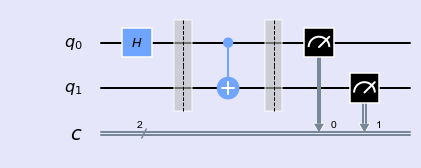

In [4]:
bell_00 = circuit_00()
drawCircuit(bell_00)

#### 1.2. Two qubit system (state vector)

<div class="alert alert-block alert-success">
    <ul>
        <li> Initial state = |00> </li>
        <li> After application of Hadamard Gate: $\frac{1}{\sqrt{2}}|00\rangle + \frac{1}{\sqrt{2}}|01\rangle $ </li>
        <li> After application of CNOT Gate: $\frac{1}{\sqrt{2}}|00 \rangle + \frac{1}{\sqrt{2}}|11 \rangle $ </li>
    </ul>
</div>


In [5]:
bell_00 = circuit_00()
writeState(bell_00)

HTMLMath(value='$$\\text{State:\n $|\\Psi\\rangle = $}(0.707+0i)|00\\rangle + (0.707+0i)|11\\rangle$$')

In [6]:
def getPhaseSeq():
    phaseDic = []
    qc0 = QuantumCircuit(2,2)
    qc1 = QuantumCircuit(2,2)
    qc1.h(0)
    qc2 = QuantumCircuit(2,2)
    qc2.h(0)
    qc2.cx(0, 1)
    for iqc in [qc0,qc1,qc2]:
        phaseDic.append(getPhase(iqc))
    return phaseDic    

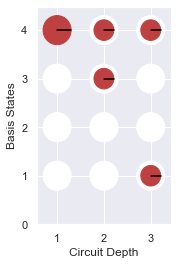

In [7]:
drawPhase(getPhaseSeq())

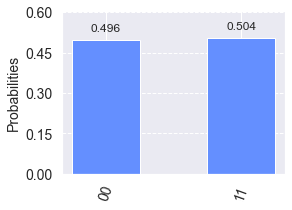

In [65]:
bell_00 = circuit_00()
simCircuit(bell_00)

#### 1.3 Single qubit states (Tensor Product)

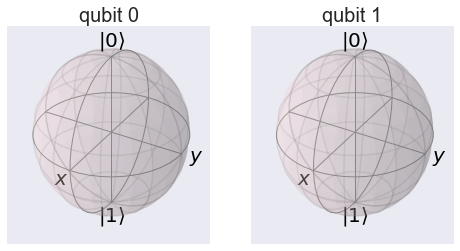

In [8]:
bell_00 = circuit_00()
blochSphere(bell_00)

<div class="alert alert-block alert-danger">
$\textbf{Question:}$ Can you write Bell state as a tensor product of single qubit state?
</div>

<div class="alert alert-block alert-info">
$\textbf{Answer}$: No, it is not possible.
</div>


#### 4. Matrix Element

<div class="alert alert-block alert-danger">
$\textbf{Question:}$ Can we write matrix represented by the Bell circuit as a  tensor product of fundamental gate matrices?
</div>

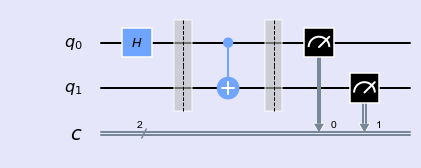

In [10]:
bell_00 = circuit_00()
drawCircuit(bell_00)

Based on above Bell circuit, lets construct the matrix representation of the circuit using fundamental gates matrices involved in the circuit.

$H = \frac{1}{\sqrt{2}} \begin{bmatrix}
    1  & 1 \\
    1 & -1
\end{bmatrix}; I = \frac{1}{\sqrt{2}} \begin{bmatrix}
    1  & 0 \\
    0 &  1
\end{bmatrix}; \text{CNOT} = \begin{bmatrix} 1 & 0 & 0 & 0 \\
                              0 & 0 & 0 & 1 \\
                              0 & 0 & 1 & 0 \\
                              0 & 1 & 0 & 0 \\
\end{bmatrix}$

- Before first barrier

$I \otimes H$ = $ \begin{bmatrix}
    H  & 0 \\
    0 & H
\end{bmatrix}$

- After first barrier

$\text{CNOT}$ 

- Net operation before measurement

$U = \text{CNOT} \times (I \otimes H)   $

Lets express ``U`` matrix using ``numpy`` library.

In [60]:
I = np.eye(2,2)
H = 1/np.sqrt(2)*np.array([[1,1],[1,-1]])
CNOT = np.array([[1,0,0,0],[0,0,0,1],[0,0,1,0],[0,1,0,0]])
I_kron_H = np.kron(I,H)
U = np.dot(C,I_kron_H)
print(U)

[[ 0.70710678  0.70710678  0.          0.        ]
 [ 0.          0.          0.70710678 -0.70710678]
 [ 0.          0.          0.70710678  0.70710678]
 [ 0.70710678 -0.70710678  0.          0.        ]]


We can also observe final ket vector by multiplying it with ```U``` matrix.

In [61]:
ket_00 = np.array([1,0,0,0])
np.dot(U,ket_00)

array([0.70710678, 0.        , 0.        , 0.70710678])

Infact we can check our matrix from our circuit shown below by implementing Q is kit's ```unitary_simulator```.

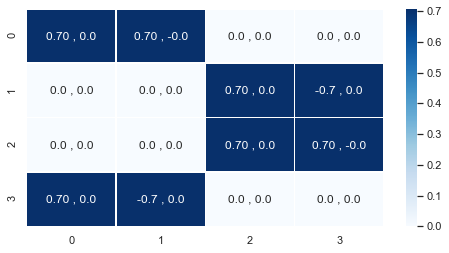

In [62]:
bell_00 = circuit_00()
plotMatrix(bell_00)

-------

### 2. Bell State Circuit ($\beta_{10}$)

In [201]:
def circuit_10():
    bell = QuantumCircuit(2,2)
    bell.x(1)
    bell.barrier()
    bell.h(0)
    bell.barrier()
    bell.cx(0, 1)
    return bell

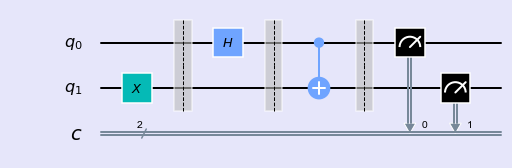

In [243]:
bell_10 = circuit_10()
drawCircuit(bell_10)

#### 2.1. Manual Approach

- initial state: |00>
- After application of not gate: |10>
- After application of Hadamard Gate: $\frac{1}{\sqrt{2}}|10> + \frac{1}{\sqrt{2}}|11> $
- After application of CNOT Gate: $\frac{1}{\sqrt{2}}|10> + \frac{1}{\sqrt{2}}|01> $

#### Matrix Element

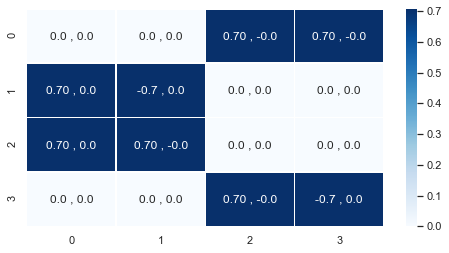

In [244]:
bell_10 = circuit_10()
plotMatrix(bell_10)

#### 2.2 Simulation

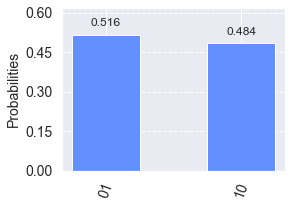

In [245]:
bell_10 = circuit_10()
simCircuit(bell_10)

### 3. Bell State Circuit ($\beta_{01}$)

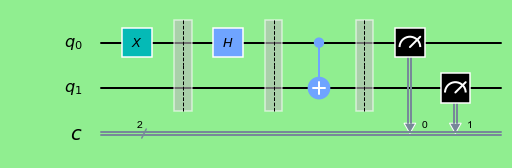

In [246]:
bell = QuantumCircuit(2,2)
bell.x(0)
bell.barrier()
bell.h(0)
bell.barrier()
bell.cx(0, 1)
bell.barrier()
bell.measure([0,1], [0,1])

style = {'backgroundcolor': 'lightgreen'}
bell.draw(output='mpl', style = style)

#### 3.1. Manual Approach

- initial state: |00>
- After application of not gate: |01>
- After application of Hadamard Gate: $\frac{1}{\sqrt{2}}|00> - \frac{1}{\sqrt{2}}|01> $
- After application of CNOT Gate: $\frac{1}{\sqrt{2}}|00> - \frac{1}{\sqrt{2}}|11> $

#### 3.2. Simulation

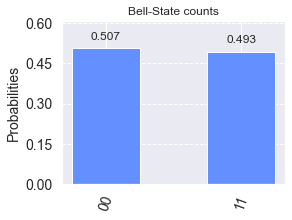

In [247]:
result = execute(bell, simulator).result()
counts = result.get_counts(bell)
plot_histogram(counts, title='Bell-State counts',figsize = [4,3])

### 4. Bell State Circuit ($\beta_{11}$)

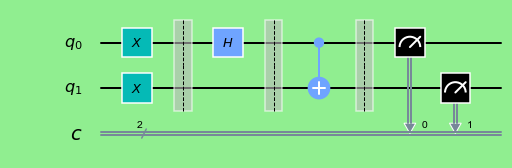

In [248]:
bell = QuantumCircuit(2,2)
bell.x(0)
bell.x(1)
bell.barrier()
bell.h(0)
bell.barrier()
bell.cx(0, 1)
bell.barrier()
bell.measure([0,1], [0,1])

style = {'backgroundcolor': 'lightgreen'}
bell.draw(output='mpl', style = style)

#### 4.1. Manual Approach

- initial state: |00>
- After application of not gate: |11>
- After application of Hadamard Gate: $\frac{1}{\sqrt{2}}|10> - \frac{1}{\sqrt{2}}|11> $
- After application of CNOT Gate: $\frac{1}{\sqrt{2}}|10> - \frac{1}{\sqrt{2}}|01> $

#### 4.4. Simulation

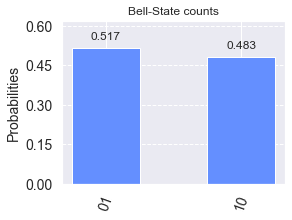

In [249]:
result = execute(bell, simulator).result()
counts = result.get_counts(bell)
plot_histogram(counts, title='Bell-State counts',figsize = [4,3])

### References

1. https://quantumcomputing.stackexchange.com/questions/2299/how-to-interpret-a-quantum-circuit-as-a-matrix

<div class="alert alert-block alert-info">
This is a blue background
</div>

<div class="alert alert-block alert-warning">
This is a yellow background
</div>

<div class="alert alert-block alert-success">
This is a green background
</div>

<div class="alert alert-block alert-danger">
This is a red background
</div>